In [2]:
#### Creating Bar Chart and folium Maps

In [1]:
import numpy as np  
import pandas as pd

In [2]:
df = pd.read_csv('https://cocl.us/datascience_survey_data',index_col=[0])
df.head()                     

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [3]:
df.sort_values(by='Very interested', ascending=False)
df['Very interested']=round((df['Very interested']/(2233))*100,2)
df['Somewhat interested']=round((df['Somewhat interested']/(2233))*100,2)
df['Not interested']=round((df['Not interested']/(2233))*100,2)
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Analysis / Statistics,75.59,19.88,2.69
Data Journalism,19.21,48.41,27.32
Data Visualization,60.01,32.87,4.57
Deep Learning,56.56,34.48,6.09


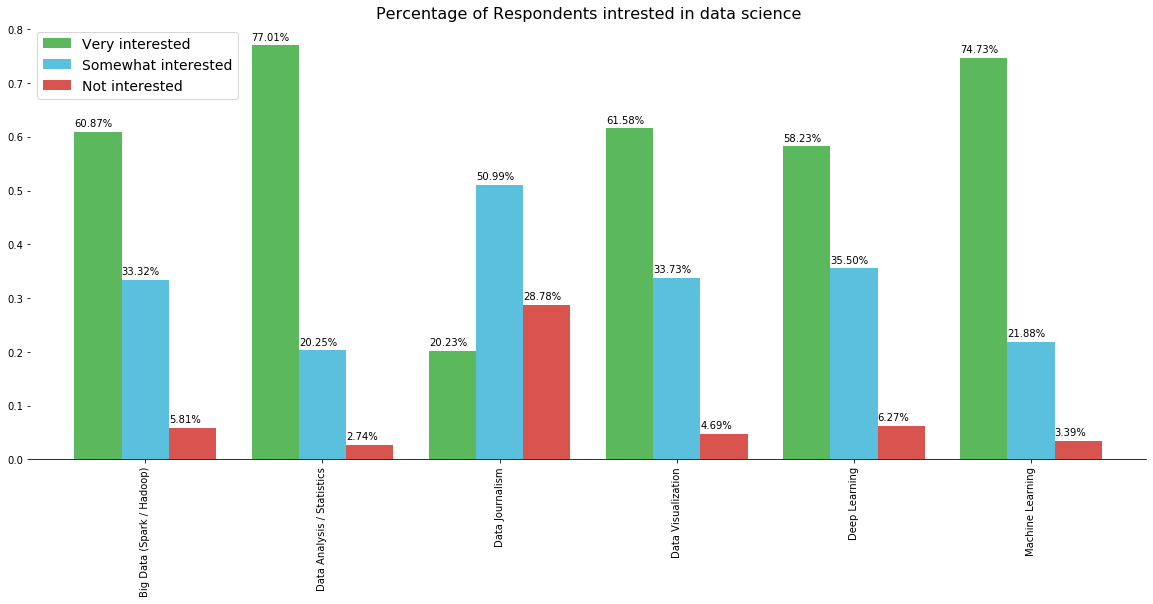

In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),color= ('#5cb85c','#5bc0de', '#d9534f'),  width = 0.8,edgecolor=None)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

plt.title('Percentage of Respondents intrested in data science',fontsize=16)
plt.legend(fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [6]:
df1 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df1.head(10)      


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [7]:
df1 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')      
df1.drop(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time','Resolution'], axis=1, inplace=True)
df1.head()

,IncidntNum,PdDistrict,Address,X,Y,Location,PdId
0,120058272,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,BAYVIEW,KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,TENDERLOIN,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,MISSION,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [8]:
df1 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')      
df2 = df1.PdDistrict.value_counts()
table = pd.DataFrame(data=df2.values, index=df2.index, columns=['Count'])


In [9]:
table.reset_index(inplace = True)
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
table.head(10)

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [11]:
df2.head

<bound method NDFrame.head of SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64>

In [12]:
import folium 
import json

In [163]:
!wget --quiet https://cocl.us/sanfran_geojson -O san.json

In [164]:
world_geo=r'san.json'

In [13]:
import folium

world_map = folium.Map(location=[37.7749 , -122.4194], zoom_start=12)
world_map

In [14]:
import folium
world_map = folium.Map(location=[37.7749 , -122.4194], zoom_start=12)
world_map
world_map.choropleth(
    geo_data=world_geo,
    data=table,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crimerate Sanfransico'
)
world_map

NameError: name 'world_geo' is not defined